# Modelo de predicción de calificaciones de restaurantes

Equipo 23:

Laura Elena Osuna Burgoin arual672@gmail.com

Jocelyn Sosa Trejo jocelynsotre@gmail.com

Laura Marisol Domínguez Antonio laura.dominguezan@outlook.com

## 1. Introducción

El objetivo principal de este proyecto de Machine Learning es desarrollar un modelo predictivo que pueda determinar la calificación que un comensal asignaría a un restaurante, basándose en una variedad de variables que describen tanto al comensal como al restaurante. El análisis de estas variables permitirá comprender mejor cómo diferentes aspectos influyen en la percepción y la experiencia del cliente al visitar un restaurante.

Al considerar una amplia gama de factores, como el perfil del comensal (estado civil, hábitos de consumo, etc.), la distancia entre el restaurante y la ubicación del comensal, la disponibilidad de áreas para fumadores, el ambiente del restaurante, etc.

La aplicación de técnicas de aprendizaje automático en este contexto no solo ofrece la posibilidad de comprender las preferencias y expectativas de los clientes, sino que también puede proporcionar a los propietarios de restaurantes información invaluable para mejorar su servicio, adaptar su ambiente y diseñar estrategias de marketing más efectivas.

A lo largo de este proyecto, se explorarán y desarrollarán diferentes algoritmos de clasificación y técnicas de procesamiento de datos para identificar patrones significativos en el conjunto de datos y construir un modelo predictivo preciso y confiable.

## 2. Importación de librerias y datasets

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re
import nltk
from nltk.corpus import stopwords
import folium
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

- Dataset: calificaciones de restaurantes.

Contiene las calificaciones obtenidas de 138 usuarios de distintos restaurantes, así como la información de los consumidores y los restaurantes.

In [ ]:
df_calificaciones = pd.read_csv('https://github.com/LauraEle24/Proyecto_Tecnolochicas_ML/raw/main/calificaciones_y_restaurante_final.csv')
df_calificaciones.head(10)

,Unnamed: 0,ID_consumidor,ID_lugar,calificacion,calificacion_comida,calificacion_servicio,latitud,longitud,fumador_activo,nivel_de_alcohol,...,estado_civil,año_nacimiento,intereses,ocupacion,presupuesto,tipo_de_comida,metodo_de_pago,tipo_de_restaurante,forma_de_pago_que_aceptan,dias_abierto
0,0,U1077,135085,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,comida_rapida,dinero_efectivo,lunes a domingo
1,1,U1077,135038,2,2,1,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,NaN,NaN,NaN
2,2,U1077,132825,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo
3,3,U1077,135060,1,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,norteamericana,dinero_efectivo,lunes a domingo
4,4,U1068,135104,1,1,2,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,tarjeta_debito_credito y dinero_efectivo,lunes a domingo
5,5,U1068,132740,0,0,0,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo
6,6,U1068,132663,1,1,1,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,NaN,NaN,NaN
7,7,U1068,132732,0,0,0,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo
8,8,U1068,132630,1,1,1,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,NaN,NaN,NaN
9,9,U1067,132584,2,2,2,23.752269,-99.168605,falso,sobrio,...,soltero,1987,tecnología,estudiante,medio,restaurante_familiar,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo



*   Datos de ubicación de restaurantes



In [ ]:
df_geo = pd.read_csv('https://github.com/LauraEle24/Proyecto_Tecnolochicas_ML/raw/main/geoplaces2.csv')
df_geo.head(10)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
5,135040,22.135617,-100.969709,0101000020957F00001B552189B84A58C15A2AAEFD2CA2...,Restaurant los Compadres,Camino a Simon Diaz 155 Centro,San Luis Potosi,SLP,Mexico,?,...,Wine-Beer,none,informal,no_accessibility,high,?,familiar,f,closed,none
6,132732,23.754357,-99.171288,0101000020957F00008A20E615808157C16272FECBF84F...,Taqueria EL amigo,Calle Mezquite Fracc Framboyanes,Cd Victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,none,casual,completely,low,?,familiar,f,open,none
7,132875,22.149901,-100.993779,0101000020957F00008A2A0747DE4758C11EB31D2A31A8...,shi ro ie,?,?,?,?,?,...,Wine-Beer,section,informal,no_accessibility,high,?,familiar,t,open,Internet
8,132609,23.760268,-99.165865,0101000020957F0000A478418BBA8057C133851EB22C4E...,Pollo_Frito_Buenos_Aires,tampico,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,not permitted,informal,completely,low,?,quiet,t,closed,none
9,135082,22.151448,-100.915099,0101000020957F0000A29FAF95CD4958C1FEEEBB73A991...,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,SLP,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none


Al notar la presencia de valores NaN en el dataset, se pudo observar que esto se debe a que no todos los restaurantes fueron calificados, por lo que se optó por eliminarlos para facilitar el análisis posterior.

In [ ]:
df_calificaciones = df_calificaciones.dropna()
df_calificaciones.head(10)

,Unnamed: 0,ID_consumidor,ID_lugar,calificacion,calificacion_comida,calificacion_servicio,latitud,longitud,fumador_activo,nivel_de_alcohol,...,estado_civil,año_nacimiento,intereses,ocupacion,presupuesto,tipo_de_comida,metodo_de_pago,tipo_de_restaurante,forma_de_pago_que_aceptan,dias_abierto
0,0,U1077,135085,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,comida_rapida,dinero_efectivo,lunes a domingo
2,2,U1077,132825,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo
3,3,U1077,135060,1,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,tecnología,estudiante,medio,latinoamericana,tarjeta_debito_credito,norteamericana,dinero_efectivo,lunes a domingo
4,4,U1068,135104,1,1,2,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,tarjeta_debito_credito y dinero_efectivo,lunes a domingo
5,5,U1068,132740,0,0,0,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo
7,7,U1068,132732,0,0,0,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,tecnología,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo
9,9,U1067,132584,2,2,2,23.752269,-99.168605,falso,sobrio,...,soltero,1987,tecnología,estudiante,medio,restaurante_familiar,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo
10,10,U1067,132733,1,1,1,23.752269,-99.168605,falso,sobrio,...,soltero,1987,tecnología,estudiante,medio,restaurante_familiar,dinero_efectivo,comida_rapida,tarjeta_debito_credito y dinero_efectivo,lunes a domingo
11,11,U1067,132732,1,2,2,23.752269,-99.168605,falso,sobrio,...,soltero,1987,tecnología,estudiante,medio,restaurante_familiar,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo
13,13,U1067,135104,0,0,0,23.752269,-99.168605,falso,sobrio,...,soltero,1987,tecnología,estudiante,medio,restaurante_familiar,dinero_efectivo,latinoamericana,tarjeta_debito_credito y dinero_efectivo,lunes a domingo


In [ ]:
df_calificaciones.shape

(815, 23)

Se eliminaron algunas filas por no tener relevancia a los resultados esperados

In [ ]:
df_calificaciones = df_calificaciones.drop(['vestimenta_preferida'], axis=1)
df_calificaciones = df_calificaciones.drop(['intereses'], axis=1)

## 3. Análisis exploratorio de los datos

### Calificaciones

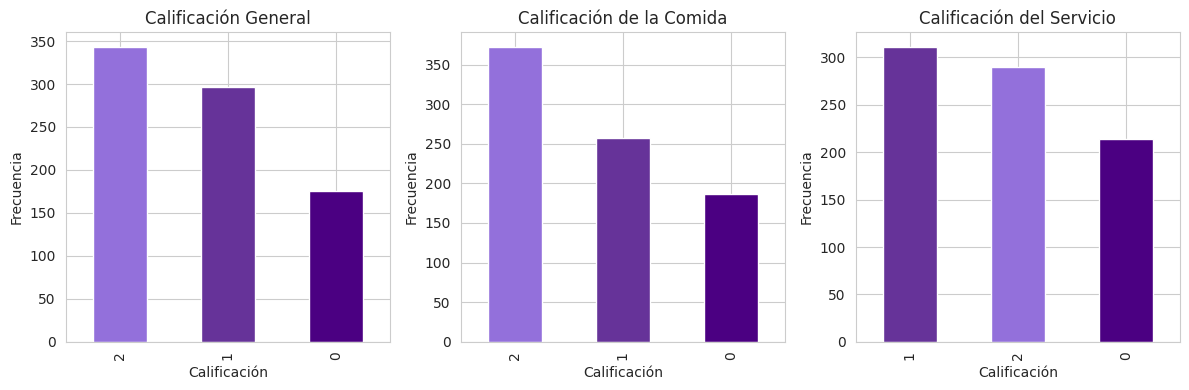

In [ ]:
plt.figure(figsize=(12, 4))

# Calificación general
plt.subplot(1, 3, 1)
df_calificaciones['calificacion'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo'])
plt.title('Calificación General')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Calificación de la comida
plt.subplot(1, 3, 2)
df_calificaciones['calificacion_comida'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo'])
plt.title('Calificación de la Comida')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Calificación del servicio
plt.subplot(1, 3, 3)
df_calificaciones['calificacion_servicio'].value_counts().plot(kind='bar', color=['rebeccapurple', 'mediumpurple', 'indigo'])
plt.title('Calificación del Servicio')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

Al analizar las tres calificaciones obtenidas por los usuarios, se puede observar un comportamiento similar en las tres gráficas donde las reseñas con un valor de 2 y 1 se encuentran en mayor cantidad. Sin embargo, en el caso de la tercera figura, hay una mayor presencia de 1 y 0 en comparación a las otras gráficas, lo cual indica que el servicio en los restaurantes es la variable con calificaciones más bajas.    

### Tipo de ambiente, número de personas fumadoras y que beben alcohol

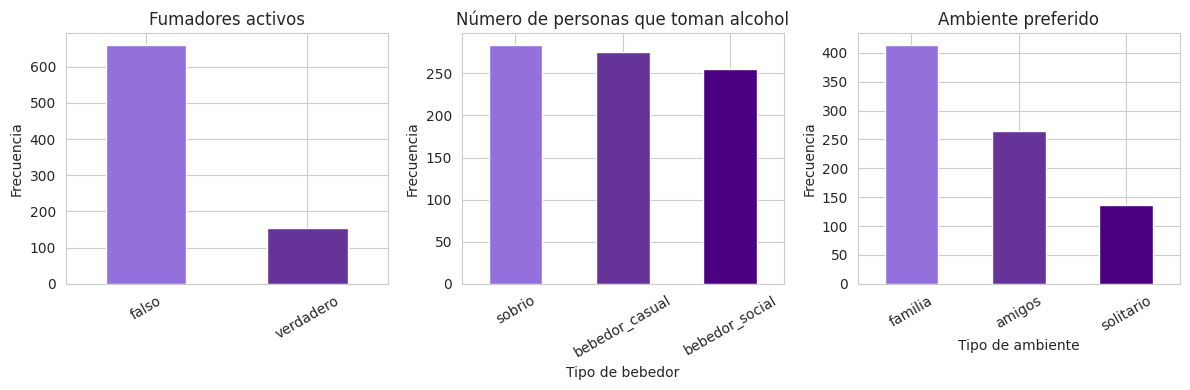

In [ ]:
plt.figure(figsize=(12, 4))

# Fumadores activos
plt.subplot(1, 3, 1)
df_calificaciones['fumador_activo'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo'])
plt.title('Fumadores activos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

# Nivel de alcohol
plt.subplot(1, 3, 2)
df_calificaciones['nivel_de_alcohol'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo'])
plt.title('Número de personas que toman alcohol')
plt.xlabel('Tipo de bebedor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

# Tipo de ambiente preferido
plt.subplot(1, 3, 3)
df_calificaciones['ambiente'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple','indigo'])
plt.title('Ambiente preferido')
plt.xlabel('Tipo de ambiente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Los resultados mostraron que la mayoria de los usuarios no eran fumadores activos, hay una mayor cantidad de personas que si beben y se prefiere un ambiente familiar.

Asi pues, es importante aclarar que los números corresponden al numero de reseñas y no al número de usuarios, ya que hay usuarios que registraron más de una reseña y por lo tanto sus datos se encuentran repetidos en el dataset.

### Estado civil, presupuesto, intereses y ocupación

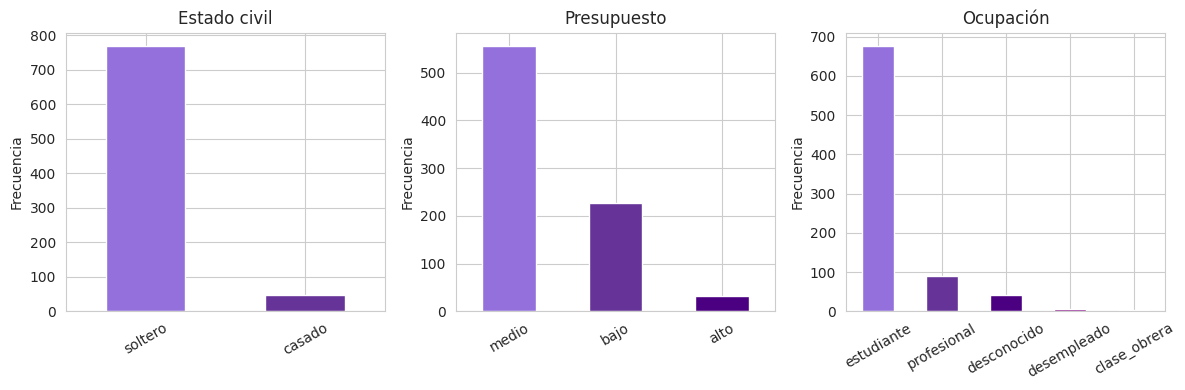

In [ ]:
plt.figure(figsize=(12, 4))

# Estado civil
plt.subplot(1, 3, 1)
df_calificaciones['estado_civil'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo'])
plt.title('Estado civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

# Presupuesto
plt.subplot(1, 3, 2)
df_calificaciones['presupuesto'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo'])
plt.title('Presupuesto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

# Ocupación
plt.subplot(1, 3, 3)
df_calificaciones['ocupacion'].value_counts().plot(kind='bar', color=['mediumpurple', 'rebeccapurple', 'indigo','purple', 'orchid'])
plt.title('Ocupación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

La mayoria de las reseñas obtenidas son de usuarios solteros, estudiantes, con un presupuesto medio e interés por la variedad.

### Edad

Se obtuvo una nueva columna de la edad a partir del año de nacimiento.

In [ ]:
df_calificaciones['edad'] = 2018 - df_calificaciones['año_nacimiento']
df_calificaciones.head()

,Unnamed: 0,ID_consumidor,ID_lugar,calificacion,calificacion_comida,calificacion_servicio,latitud,longitud,fumador_activo,nivel_de_alcohol,...,estado_civil,año_nacimiento,ocupacion,presupuesto,tipo_de_comida,metodo_de_pago,tipo_de_restaurante,forma_de_pago_que_aceptan,dias_abierto,edad
0,0,U1077,135085,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,estudiante,medio,latinoamericana,tarjeta_debito_credito,comida_rapida,dinero_efectivo,lunes a domingo,31
2,2,U1077,132825,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,estudiante,medio,latinoamericana,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,31
3,3,U1077,135060,1,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,1987,estudiante,medio,latinoamericana,tarjeta_debito_credito,norteamericana,dinero_efectivo,lunes a domingo,31
4,4,U1068,135104,1,1,2,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,tarjeta_debito_credito y dinero_efectivo,lunes a domingo,30
5,5,U1068,132740,0,0,0,23.752269,-99.168605,falso,bebedor_casual,...,soltero,1988,estudiante,bajo,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,30


In [ ]:
df_calificaciones['ID_lugar'].value_counts()

135085    36
132825    32
135032    28
135052    25
132834    25
          ..
132715     4
135044     4
135018     4
132766     3
132717     3
Name: ID_lugar, Length: 85, dtype: int64

In [ ]:
df_calificaciones = df_calificaciones.drop(['año_nacimiento'], axis=1)

In [ ]:
df_calificaciones.edad.describe()

count    815.000000
mean      34.304294
std       16.552520
min       24.000000
25%       27.000000
50%       29.000000
75%       31.000000
max       88.000000
Name: edad, dtype: float64

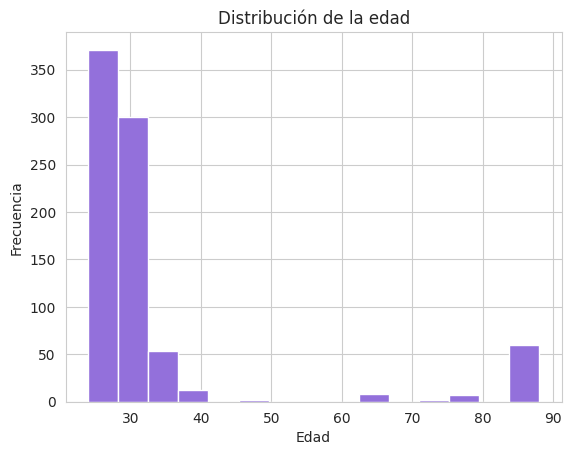

In [ ]:
df_calificaciones['edad'].hist(bins=15, color='mediumpurple')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
df_calificaciones['edad'].value_counts()

27    196
29    174
28    154
88     60
30     55
31     51
35     21
32     20
26     18
36     16
33     12
37      9
66      8
78      7
34      4
39      3
49      2
25      2
75      2
24      1
Name: edad, dtype: int64

Boxplot

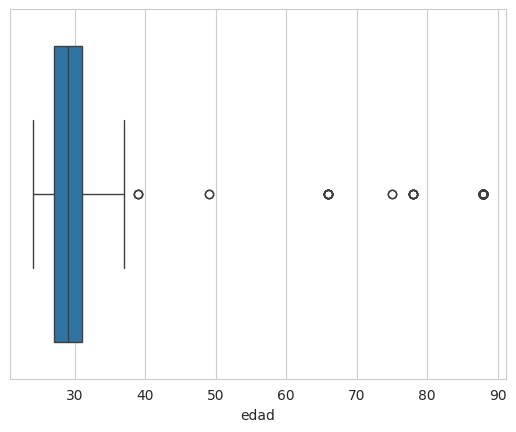

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x=df_calificaciones['edad']);

Se pudo observar que la tendencia central de la edad se encuentra entre los 20 y 35 años. Además, existen valores atipicos en el rango de 75-90 años, pero se optó por no eliminarlos debido a que hay más de 60 reseñas que corresponden a usuarios de estas edades.

### Tipo de comida

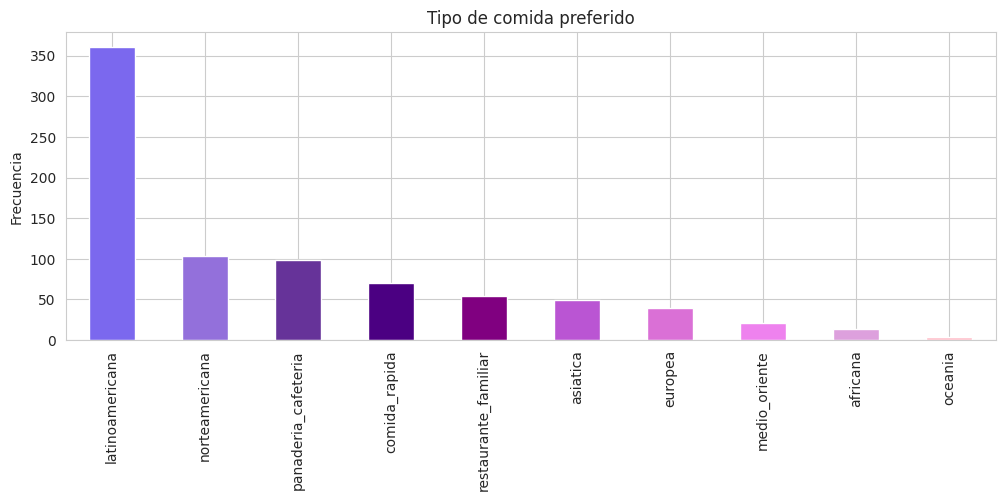

In [ ]:
plt.figure(figsize=(12, 4))
df_calificaciones['tipo_de_comida'].value_counts().plot(kind='bar', color=['mediumslateblue', 'mediumpurple', 'rebeccapurple', 'indigo', 'purple','mediumorchid', 'orchid', 'violet', 'plum', 'pink'])
plt.title('Tipo de comida preferido')
plt.ylabel('Frecuencia')
plt.show()


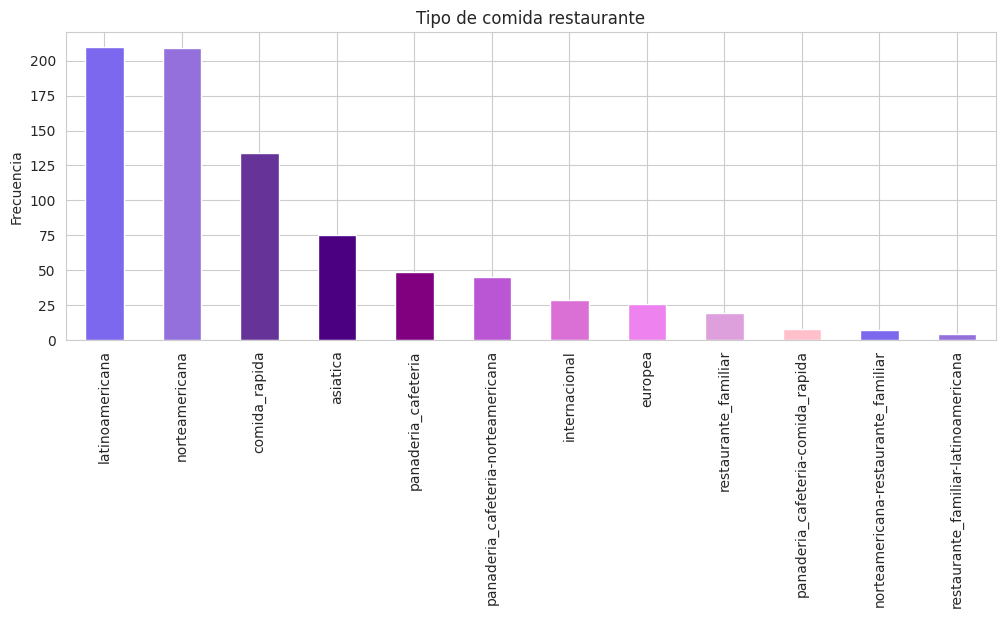

In [ ]:
plt.figure(figsize=(12, 4))
df_calificaciones['tipo_de_restaurante'].value_counts().plot(kind='bar', color=['mediumslateblue', 'mediumpurple', 'rebeccapurple', 'indigo', 'purple','mediumorchid', 'orchid', 'violet', 'plum', 'pink'])
plt.title('Tipo de comida restaurante')
plt.ylabel('Frecuencia')
plt.show()

Las gráficas de frecuencia de comida preferida y comida disponible en los restaurantes tienen un comportamiento similar, donde hay una mayor frecuencia de comida latinoamericana y norteamericana.

### Tablas de contingencia

### Presupuesto y estado civil

In [ ]:
crosstab = pd.crosstab(df_calificaciones['presupuesto'], df_calificaciones['estado_civil'])
crosstab

estado_civil,casado,soltero
presupuesto,,
alto,0,31
bajo,0,228
medio,47,509


Se puede observar que no hay una relación directa entre estado civil y presupuesto, ya que la mayoria de los usuarios son solteros. Sin embargo, todos los usuarios casados cuentan con presupuesto medio, mientras que los solteros si contaban con presupuestos variables bajos, medio y alto.

### Medio de transporte y ocupación

In [ ]:
crosstab = pd.crosstab(df_calificaciones['medio_de_transporte'], df_calificaciones['ocupacion'])
crosstab

ocupacion,clase_obrera,desconocido,desempleado,estudiante,profesional
medio_de_transporte,,,,,
auto,0,2,7,160,46
caminando,0,0,0,89,4
desconocido,0,31,0,9,0
transporte_publico,2,8,0,418,39


Los medios de transporte más utilizados fueron el auto y el transporte publico, donde la mayoria de los estudiantes optaron por transporte publico y los profesionistas por el auto.

### Nivel de alcohol y ocupación

In [ ]:
crosstab = pd.crosstab(df_calificaciones['nivel_de_alcohol'], df_calificaciones['ocupacion'])
crosstab

ocupacion,clase_obrera,desconocido,desempleado,estudiante,profesional
nivel_de_alcohol,,,,,
bebedor_casual,0,0,0,257,19
bebedor_social,2,0,0,224,29
sobrio,0,41,7,195,41


En cuanto al nivel alcohol que suelen consumir los usuarios, hay más estudiantes que son bebedores casuales y sociales, mientras que en profesionales predomina la sobriedad.

### Edad y ambiente

In [ ]:
crosstab = pd.crosstab(df_calificaciones['edad'], df_calificaciones['ambiente'])
crosstab

ambiente,amigos,familia,solitario
edad,,,
24,1,0,0
25,0,2,0
26,0,17,1
27,49,127,20
28,57,91,6
29,45,78,51
30,25,18,12
31,19,32,0
32,10,9,1


Si bien no se puede observar una relación directa entre el ambiente y la edad de los usuarios, existe una ligera preferencia por el ambiente familiar en el grupo de 25-30 años.

## 4. Modelos de Machine Learning

Una vez realizado el análisis exploratorio de los datos, se tomó la decisión de realizar un modelo de predicción de calificaciones para un restaurante en específico, el cual permita predecir las calificaciones de este tomando como referencia las caracteristicas del usuario. De esta manera, al contar con una gran cantidad de variables categóricas y un valor objetivo (calificación) de tipo ordinal, se optó por utilizar modelos de clasificación.

Asi pues, de la base de datos se analizó cual tenía la mayor cantidad de usuarios que habían calificado el restaurante y se realizo una nueva tabla.



*   Selección de restaurante




In [ ]:
df_calificaciones['ID_lugar'].value_counts()

135085    36
132825    32
135032    28
135052    25
132834    25
          ..
132715     4
135044     4
135018     4
132766     3
132717     3
Name: ID_lugar, Length: 85, dtype: int64

In [ ]:
df_restaurante_1 = df_calificaciones[df_calificaciones['ID_lugar'] == 132825]
df_restaurante_1.head(10)

,Unnamed: 0,ID_consumidor,ID_lugar,calificacion,calificacion_comida,calificacion_servicio,latitud,longitud,fumador_activo,nivel_de_alcohol,...,medio_de_transporte,estado_civil,ocupacion,presupuesto,tipo_de_comida,metodo_de_pago,tipo_de_restaurante,forma_de_pago_que_aceptan,dias_abierto,edad
2,2,U1077,132825,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,transporte_publico,casado,estudiante,medio,latinoamericana,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,31
182,182,U1055,132825,2,2,2,22.143289,-100.987683,falso,sobrio,...,auto,casado,profesional,medio,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,66
185,185,U1053,132825,1,2,0,22.175833,-100.986671,falso,bebedor_casual,...,transporte_publico,soltero,estudiante,bajo,europea,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,28
208,208,U1081,132825,1,0,1,22.207749,-100.942383,falso,bebedor_casual,...,transporte_publico,soltero,estudiante,bajo,norteamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,27
216,216,U1001,132825,2,2,1,22.139997,-100.978803,falso,sobrio,...,caminando,soltero,estudiante,medio,norteamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,29
248,248,U1056,132825,2,2,2,22.168997,-100.974376,falso,bebedor_social,...,caminando,soltero,estudiante,medio,restaurante_familiar,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,88
253,253,U1134,132825,1,2,1,22.149654,-100.998610,falso,bebedor_casual,...,transporte_publico,soltero,estudiante,medio,latinoamericana,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,27
352,352,U1116,132825,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,transporte_publico,casado,estudiante,medio,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,31
389,389,U1024,132825,1,1,0,22.154021,-100.976028,falso,sobrio,...,desconocido,soltero,desconocido,medio,panaderia_cafeteria,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,88
402,402,U1132,132825,2,2,2,22.150000,-100.983000,falso,bebedor_casual,...,transporte_publico,soltero,estudiante,medio,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,27




*   Distancia entre consumidores y restaurante

Se realizo el calculo de la distancia (km) entre el consumidor y el restaurante para analizar si esto influye en la caificación obtenida por los comensales.

In [ ]:
new_table = df_geo[['placeID','latitude', 'longitude']]
new_table[new_table['placeID'] == 132825]

,placeID,latitude,longitude
1,132825,22.147392,-100.983092


In [ ]:
def distancia_hav(lat_1, lon_1, lat_2, lon_2):
    R = 6371.0  # Radio de la Tierra en kilómetros
    lat_1, lon_1, lat_2, lon_2 = map(math.radians, [lat_1, lon_1, lat_2, lon_2])  # Convertir a radianes
    diferencia_lat = lat_2 - lat_1
    diferencia_lon = lon_2 - lon_1
    a = math.sin(diferencia_lat / 2)**2 + math.cos(lat_1) * math.cos(lat_2) * math.sin(diferencia_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distancia = R * c
    return distancia

In [ ]:
lat_origen = new_table.loc[0, 'latitude']
lon_origen = new_table.loc[0, 'longitude']

In [ ]:
df_restaurante_1['distancia_al_origen'] = df_calificaciones.apply(lambda row: distancia_hav(lat_origen, lon_origen, row['latitud'], row['longitud']), axis=1)
df_restaurante_1.head()

<ipython-input-242-824a21c865e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurante_1['distancia_al_origen'] = df_calificaciones.apply(lambda row: haversine(lat_origen, lon_origen, row['latitud'], row['longitud']), axis=1)


,Unnamed: 0,ID_consumidor,ID_lugar,calificacion,calificacion_comida,calificacion_servicio,latitud,longitud,fumador_activo,nivel_de_alcohol,...,estado_civil,ocupacion,presupuesto,tipo_de_comida,metodo_de_pago,tipo_de_restaurante,forma_de_pago_que_aceptan,dias_abierto,edad,distancia_al_origen
2,2,U1077,132825,2,2,2,22.156469,-100.985540,falso,bebedor_social,...,casado,estudiante,medio,latinoamericana,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,31,406.229831
182,182,U1055,132825,2,2,2,22.143289,-100.987683,falso,sobrio,...,casado,profesional,medio,latinoamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,66,405.037448
185,185,U1053,132825,1,2,0,22.175833,-100.986671,falso,bebedor_casual,...,soltero,estudiante,bajo,europea,tarjeta_debito_credito,latinoamericana,dinero_efectivo,lunes a domingo,28,408.189676
208,208,U1081,132825,1,0,1,22.207749,-100.942383,falso,bebedor_casual,...,soltero,estudiante,bajo,norteamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,27,409.254326
216,216,U1001,132825,2,2,1,22.139997,-100.978803,falso,sobrio,...,soltero,estudiante,medio,norteamericana,dinero_efectivo,latinoamericana,dinero_efectivo,lunes a domingo,29,404.286130


In [ ]:
df_restaurante_1['distancia_al_origen'].value_counts()

405.471561    3
406.229831    2
411.098805    1
12.287624     1
399.499808    1
406.751259    1
402.347772    1
409.695127    1
403.129078    1
405.940457    1
404.312014    1
400.757002    1
407.739704    1
407.885594    1
423.993719    1
405.908976    1
405.037448    1
406.756664    1
406.193822    1
405.140924    1
405.531244    1
406.819710    1
405.532769    1
406.190485    1
406.929149    1
404.286130    1
409.254326    1
408.189676    1
405.495740    1
Name: distancia_al_origen, dtype: int64



*   Selección de variables de interés




Tomando en cuenta los objetivos del modelo, se optó por reducir el número de variables, eliminando aquellas que eran caracteristicas de los restaurantes, ya que al seleccionar solo un lugar las cualidades de este se vuelven constantes.

In [ ]:
df_restaurante_1 = df_restaurante_1 [['ID_consumidor', 'ID_lugar', 'calificacion', 'distancia_al_origen','fumador_activo', 'nivel_de_alcohol', 'edad', 'ocupacion', 'presupuesto', 'medio_de_transporte', 'ambiente']]
df_restaurante_1.head()

,ID_consumidor,ID_lugar,calificacion,distancia_al_origen,fumador_activo,nivel_de_alcohol,edad,ocupacion,presupuesto,medio_de_transporte,ambiente
2,U1077,132825,2,406.229831,falso,bebedor_social,31,estudiante,medio,transporte_publico,familia
182,U1055,132825,2,405.037448,falso,sobrio,66,profesional,medio,auto,familia
185,U1053,132825,1,408.189676,falso,bebedor_casual,28,estudiante,bajo,transporte_publico,familia
208,U1081,132825,1,409.254326,falso,bebedor_casual,27,estudiante,bajo,transporte_publico,familia
216,U1001,132825,2,404.286130,falso,sobrio,29,estudiante,medio,caminando,familia


In [ ]:
df_restaurante_1.columns

Index(['ID_consumidor', 'ID_lugar', 'calificacion', 'distancia_al_origen',
       'fumador_activo', 'nivel_de_alcohol', 'edad', 'ocupacion',
       'presupuesto', 'medio_de_transporte', 'ambiente'],
      dtype='object')



*   Cambio de variables categóricas a numéricas




Se llevó a cabo una transformación de las variables categoricas a numericas con el objetivo de hacerlas reconocibles por el modelo.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
O_codificador_ordinal = OrdinalEncoder()
df_restaurante_1["fumador_activo_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["fumador_activo"]])
df_restaurante_1["nivel_de_alcohol_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["nivel_de_alcohol"]])
df_restaurante_1["ocupacion_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["ocupacion"]])
df_restaurante_1["presupuesto_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["presupuesto"]])
df_restaurante_1["medio_de_transporte_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["medio_de_transporte"]])
df_restaurante_1["ambiente_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["ambiente"]])

<ipython-input-246-e0a305eb28ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurante_1["fumador_activo_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["fumador_activo"]])
<ipython-input-246-e0a305eb28ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurante_1["nivel_de_alcohol_num"] = O_codificador_ordinal.fit_transform(df_restaurante_1[["nivel_de_alcohol"]])
<ipython-input-246-e0a305eb28ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
df_restaurante_1.head()

,ID_consumidor,ID_lugar,calificacion,distancia_al_origen,fumador_activo,nivel_de_alcohol,edad,ocupacion,presupuesto,medio_de_transporte,ambiente,fumador_activo_num,nivel_de_alcohol_num,ocupacion_num,presupuesto_num,medio_de_transporte_num,ambiente_num
2,U1077,132825,2,406.229831,falso,bebedor_social,31,estudiante,medio,transporte_publico,familia,0.0,1.0,1.0,2.0,3.0,1.0
182,U1055,132825,2,405.037448,falso,sobrio,66,profesional,medio,auto,familia,0.0,2.0,2.0,2.0,0.0,1.0
185,U1053,132825,1,408.189676,falso,bebedor_casual,28,estudiante,bajo,transporte_publico,familia,0.0,0.0,1.0,1.0,3.0,1.0
208,U1081,132825,1,409.254326,falso,bebedor_casual,27,estudiante,bajo,transporte_publico,familia,0.0,0.0,1.0,1.0,3.0,1.0
216,U1001,132825,2,404.286130,falso,sobrio,29,estudiante,medio,caminando,familia,0.0,2.0,1.0,2.0,1.0,1.0




*   Función Pipeline








Se utilizó la función Pipeline con el fin de eficientar el flujo de trabajo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
numeric_list=['ID_lugar','calificacion','distancia_al_origen','edad']
categorical_list=['ID_consumidor','fumador_activo','nivel_de_alcohol','ocupacion','presupuesto','medio_de_transporte','ambiente']

In [ ]:
numeric_transformer= Pipeline (steps= [('scaler',StandardScaler())])
categorical_transformer= Pipeline (steps= [('onehot',OneHotEncoder())])

In [ ]:
transformer = ColumnTransformer ([
('num',numeric_transformer,numeric_list) , ('cat',categorical_transformer,categorical_list)
])

Preparando las muestras de entrenamiento y prueba

In [ ]:
x = df_restaurante_1[['fumador_activo_num','distancia_al_origen', 'nivel_de_alcohol_num', 'ocupacion_num', 'presupuesto_num', 'medio_de_transporte_num', 'ambiente_num']]
y = df_restaurante_1['calificacion']

Division de datos para entrenamiento y prueba tomando solo los datos númericos.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape,y_test.shape, x_test.shape, y_test.shape

((22, 7), (10,), (10, 7), (10,))

# Arbol de decision

El arbol de decisión es un modelo muy útil para realizar clasificación. En este caso se eligió debido a que se puede utilizar de manera eficiente cuando se tienen variables categóricas. Además, sus resultados son más fáciles de interpretar en comparación a otros modelos y es posible analizar de forma visual la lógica con la que se lleva a cabo la clasificación.

In [ ]:
from sklearn import metrics



*   Entrenamiento del modelo



In [ ]:
from sklearn import tree
arbol_decision = tree.DecisionTreeClassifier()
pipeline_arbol = Pipeline (steps=[
    ('transformer', transformer),
    ('arbol_decision', arbol_decision)
])
arbol_decision.fit(x_train, y_train)

DecisionTreeClassifier()



*   Visualización




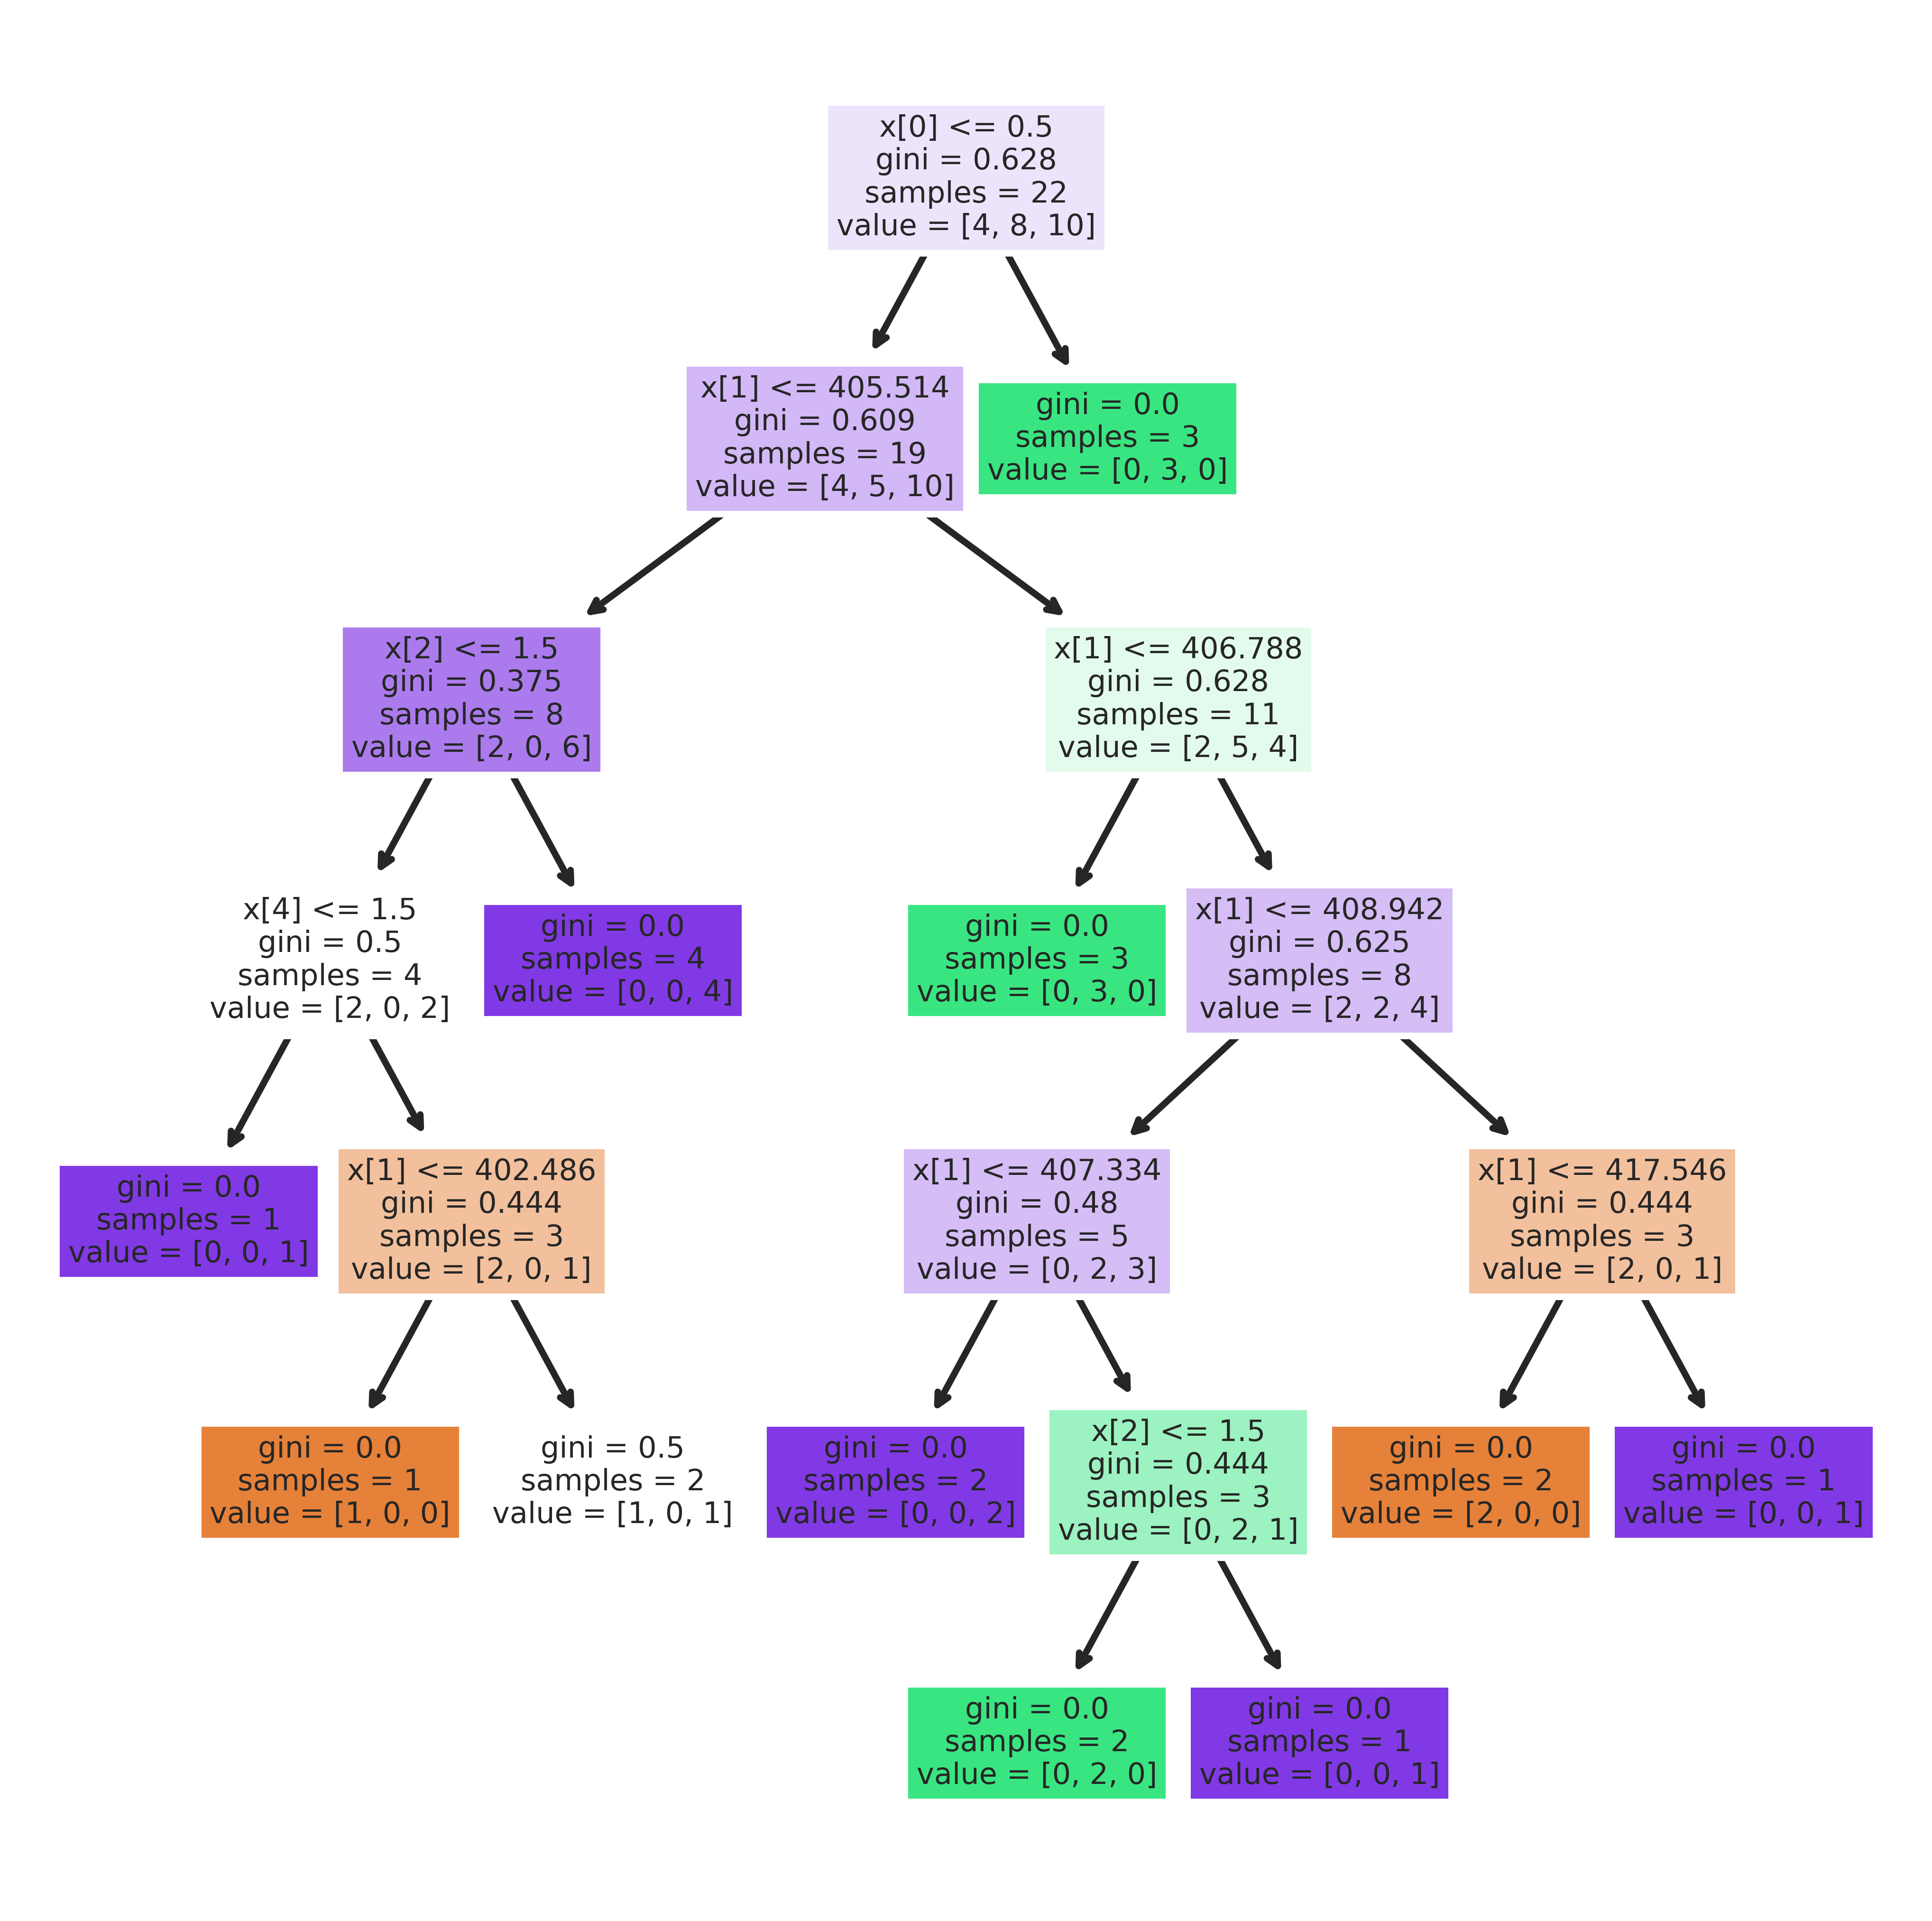

In [ ]:
plt.figure(figsize = (5,5), dpi = 1000)
tree.plot_tree(arbol_decision,filled = True);
plt.show()



*   Análisis y resultados
  *   La metrica utilizada para la toma de decisiones en el modelo es el índice de Gini, el cual determina que tan mezcladas se encuentran las clases, de tal manera que mientras más cercano a 0 sea el indice, mejor separadas estan las clases.
  *   En cuanto a los criterios de clasificación, las variables con un mayor peso en la toma de decisiones fueron la distancia, si es fumador activo, nivel de alcohol y el presupuesto.
  *   Los valores resultantes en cada hoja muestran matrices de 3 números, estos corresponden al número de incidencias de cada una de las clases (calificaciones).
  *  Se puede notar que todas las hojas presentan un indice Gini de 0, a excepción de una, la cual cuenta con un indice de 0.5 y una clasificación de dos muestras en dos clases a la vez.







*   Matriz de confusión






[[0 1 1]
 [2 1 0]
 [0 4 1]]


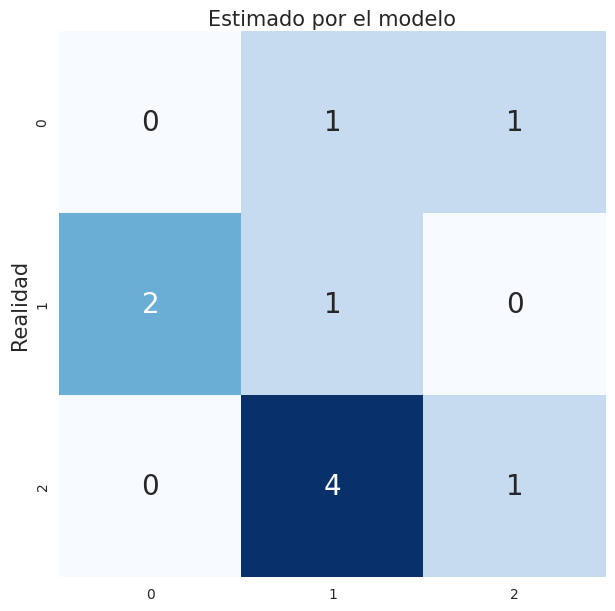

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = arbol_decision.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Se obtuvo una matriz de confusión de 3 x 3, debido a la presencia de 3 clases (0,1,2). Debido a la complejidad para determinar la eficacia del modelo de esta forma, se realizó un reporte de clasificación.





In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.17      0.33      0.22         3
           2       0.50      0.20      0.29         5

    accuracy                           0.20        10
   macro avg       0.22      0.18      0.17        10
weighted avg       0.30      0.20      0.21        10



Este reporte se interpreta de la siguiente manera:


*   Presición es la proporción de muestras que pertenecen a cada clase clasificadas como positivas y que son realmente positivas.
*   Accuracy o exactitud es la capacidad del modelo para clasificar correctamente las muestras en todo el dataset

Asi pues, el arbol de decisión presenta valores bajos de exactitud y precisión, siendo estos 0.2 y 0.3, respectivamente.


*   Validación cruzada





In [ ]:
scores = cross_val_score(arbol_decision, x, y, cv=5, scoring='accuracy')
print(f'Accuracy promedio: {scores.mean()}')

Accuracy promedio: 0.3857142857142857


# Random Forest


Random Forest es un logaritmo de aprendizaje automático que maneja problemas de clasificación y regresión en el que combina la salida de múltiples árboles de decisión. En este proyecto se decidió hacer random forest debido a nuestro problema que era de clasificación y porque este es un modelo que maneja tareas con un gran grado de precisión.

In [ ]:
from sklearn.ensemble import RandomForestClassifier as forest

In [ ]:
bosque = forest(n_estimators = 2000,
                max_depth = 10,
                min_samples_split = 2,
                min_samples_leaf =1,
                random_state =42)
bosque.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=2000, random_state=42)

In [ ]:
y_pred = bosque.predict(x_test)
y_pred

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 1])



*   Visualización




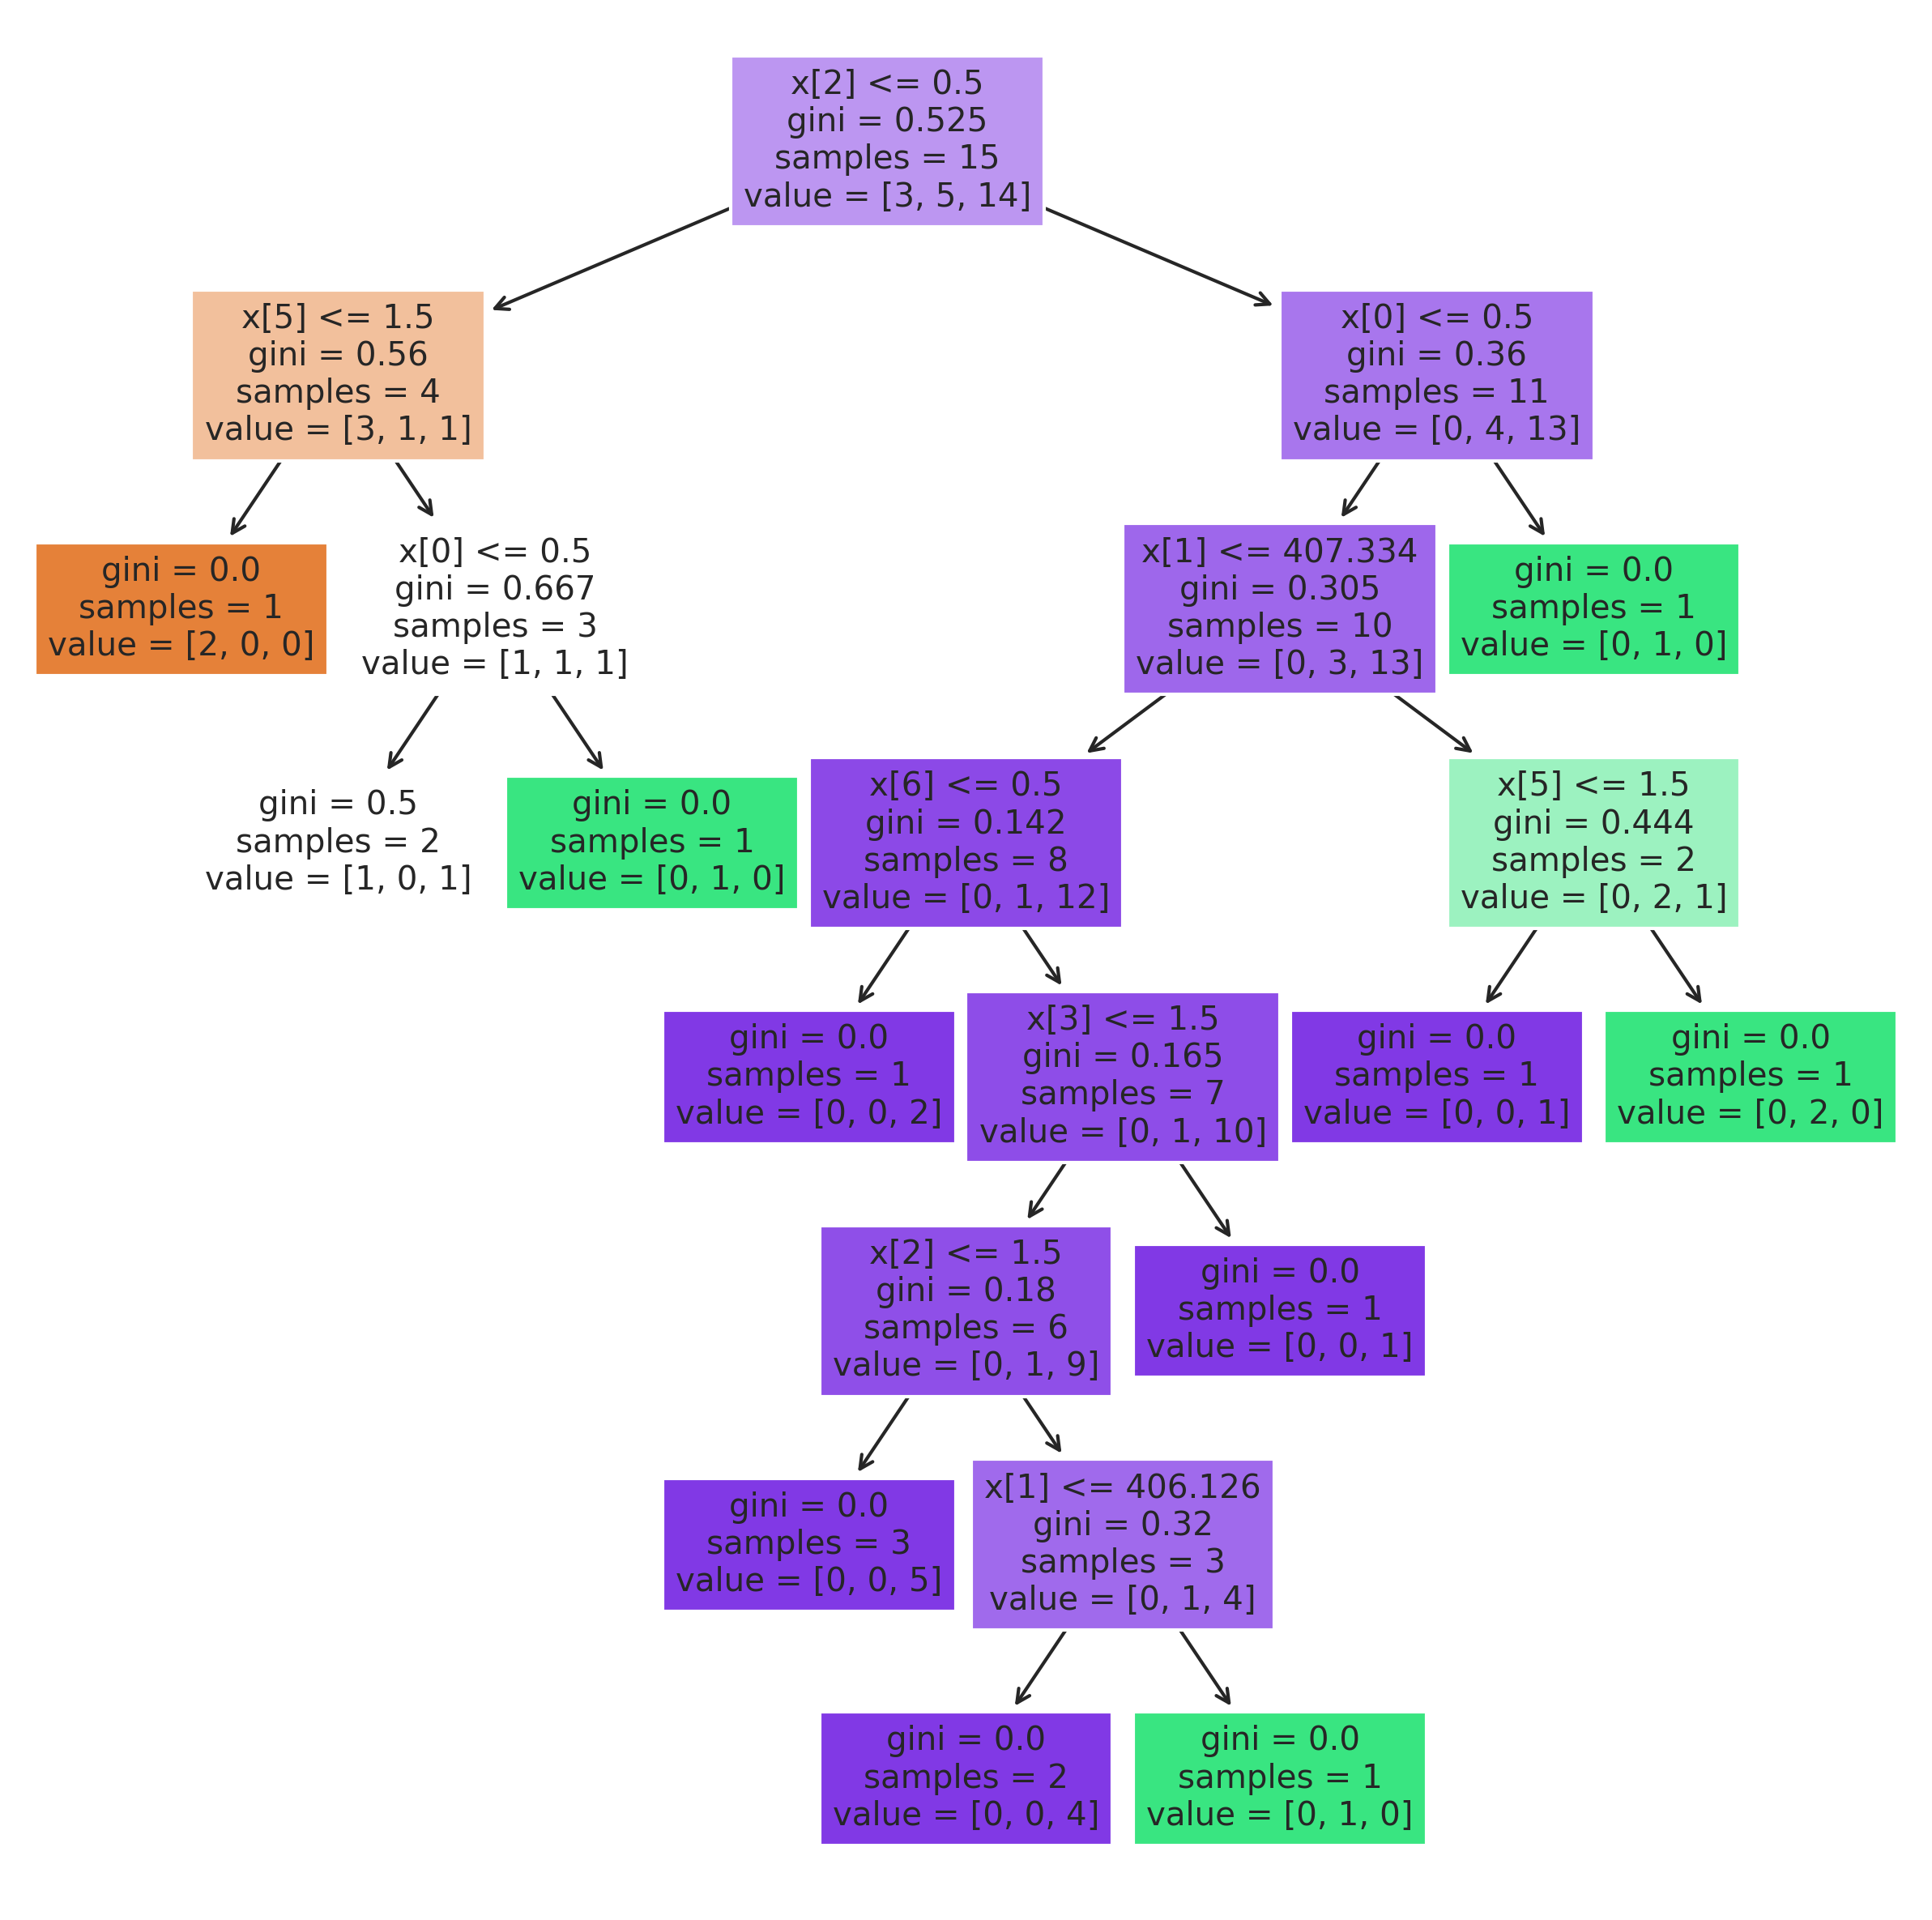

In [ ]:
numeroArbol = 18
arbolDelBosque = bosque.estimators_[numeroArbol]

plt.figure(figsize = (10,10), dpi = 300)
tree.plot_tree(arbolDelBosque,filled = True);
plt.show()



*   Análisis y resultados
  *  Se puede observar un mayor balance en comparación al arbol de decisión
  *  Una mayor cantidad de variables fueron consideradas en la toma de decisiones (todas a excepción del presupuesto)
  *  Al igual que en el arbol de decisión, hay una hoja con un indice de gini de 0.5, el cual clasifica dos muestras en dos categorias al mismo tiempo.






*   Matriz de confusion




In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

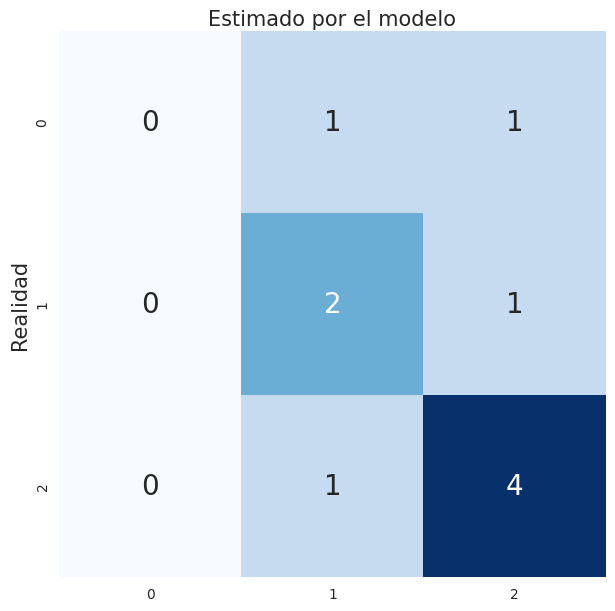

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3
           2       0.67      0.80      0.73         5

    accuracy                           0.60        10
   macro avg       0.39      0.49      0.43        10
weighted avg       0.48      0.60      0.54        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Al igual que el arbol de decisión, Random Forest presenta valores bajos de exactitud y precisión, siendo estos 0.6 y 0.48, respectivamente. Sin embargo, estos son mayores al modelo anterior, mostrando una mayor eficiencia general.



*  Validación cruzada




In [ ]:
scores = cross_val_score(bosque, x, y, cv=5, scoring='accuracy')
print(f'Accuracy promedio: {scores.mean()}')

Accuracy promedio: 0.44761904761904764


## 5. Conclusiones



*   El random forest tuvo mejores resultados mostrados por los parámetros de presición y el valor medio de accuracy en comparación con el árbol de decisión.
*   Ambos modelos tienen un accuracy y precisión menor al 50%, lo cual indica que se requiere de un mejor set de datos para cumplir con el objetivo del modelo de forma eficiente.
*   Tener un dataset con una mayor cantidad de variables númericas y una mayor cantidad de reseñas por restaurante podría ser de ayuda para mejorar el entrenamiento de los modelos, ya que solo hay un máximo de 35 calificaciones por establecimiento.
*   Realizar una comparación de los resultados de ambos modelos utilizando otros restaurantes, puede ser de utilidad para comprender mejor el funcionamiento de los modelos y las áreas de oportunidad.
*   Una vez que se tenga un modelo con una mejor exactitud y precisión, es recomendable analizar con mayor profundidad el nivel de impacto que tiene cada una de las variables sobre la calificación del usuario, ya que esto podría ser de interés para los restaurantes implicados.

